# Predicting Food Delivery Time

## Exploratory Data Analysis (EDA)

### 1. Load the dataset, handle any missing/Nan values and encode the categorical features using an appropriate method.

#### Loading and handling missing/Nan Values

In [2]:
import pandas as pd

data = pd.read_csv('data/Food_Delivery_Times.csv')


print(data.isnull().sum())


Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [3]:
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [4]:
numerical_columns

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

In [5]:
categorical_columns

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')

In [6]:
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [7]:
data[categorical_columns] = data[categorical_columns].fillna('Unknown') # need to think, if I should use something like Mode of the column?


#### Encoding Categorical Features

In [8]:
data_categorical = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [9]:
data_categorical

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Unknown,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Unknown,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,False,True,True,False,False,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,False,True,False,False,False,False,True,False,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,False,True,False,False,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,13,3.0,54,False,False,False,False,False,False,False,False,True,False,False,False,True,False
996,271,16.28,8,9.0,71,False,True,False,False,False,True,False,False,False,True,False,False,False,True
997,861,15.62,26,2.0,81,False,False,True,False,False,False,False,False,True,False,False,False,False,True
998,436,14.17,8,0.0,55,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [10]:
data[data["Order_ID"] == 313]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
42,313,0.99,Unknown,Medium,Evening,Bike,15,4.579381,32


### 2. Plot histograms, boxplots, violin plots, etc. for the features (choose plots based on type of feature). State your observations/insights.

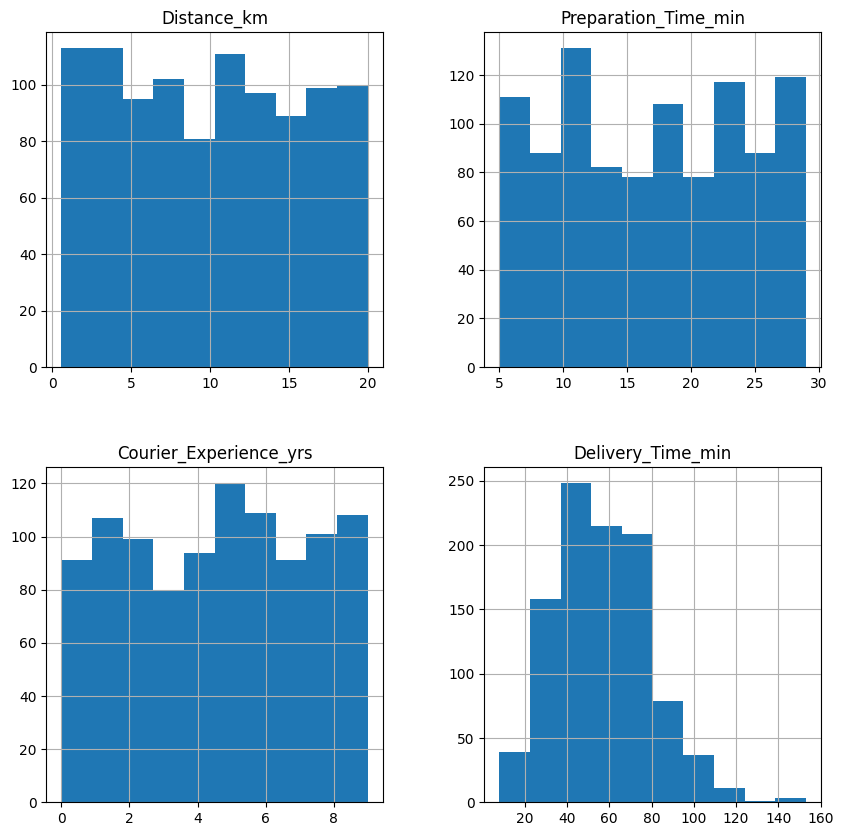

In [11]:
import matplotlib.pyplot as plt

excluded_column = 'Order_ID'
data_without_order_id = data.drop(columns=[excluded_column])

data_without_order_id.hist(figsize=(10, 10))
plt.show()

### 3. Split the dataset into train, test and validation sets (70:15:15 split) and scale the features

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# data[categorical_columns] = data[categorical_columns].fillna(
#     data[categorical_columns].mode().iloc[0]
# )

X = data_categorical.drop('Delivery_Time_min', axis=1)
y = data_categorical['Delivery_Time_min']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) # (training) + (test + validation)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # (test) + (validation)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

print("Training set shape:", X_train_scaled.shape, y_train.shape)
print("Validation set shape:", X_val_scaled.shape, y_val.shape)
print("Test set shape:", X_test_scaled.shape, y_test.shape)


Training set shape: (700, 18) (700,)
Validation set shape: (150, 18) (150,)
Test set shape: (150, 18) (150,)


## Linear Regression with Gradient Descent

In [ ]:
# I am assuming that the bias is also a weight

import numpy as np

def initialise_weights(num_params: int, scale: float, method: str):
    if method == "random":
        weights = np.random.random(num_params * scale)

    elif method == "zeroes":
        weights = np.zeroes(num_params)

    return weights

def stochastic_gd(weights):
    pass

def 